![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/69450217-6cee2780-0d3b-11ea-947b-461ea407da85.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# New York City Airbnb Open Data

Let's put in practice the topics covered in the course and analyze Airbnb listings data.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the `airbnb_data` dataset into a `airbnb_df` DataFrame variable.

This data file includes all needed information to find out more about hosts and geographical availability.

This public dataset is part of Airbnb, and the original source can be found on this [website](http://insideairbnb.com/).

Here's a preview of that file:

In [2]:
!head airbnb_data.csv

listing_id,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,,,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.1,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,"Murray Hill, Manhattan",40.74767

The column names are taken from the original documentation for this dataset.

In [42]:
# your code goes here

df = pd.read_csv('airbnb_data.csv')
df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0


In [66]:
df.shape

(962, 15)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Setting `airbnb_data` index.

Set the index of the DataFrame to the `listing_id` column.

In [43]:
# your code goes here
df.set_index('listing_id', inplace=True)
df.head(10)


,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
listing_id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,"Murray Hill, Manhattan",40.74767;-73.975,Entire home/apt,"$200,00.-",3,74,22/6/19,0.59,1,129
5121,BlissArtsSpace!,7356,Garon,"Bedford-Stuyvesant, Brooklyn",40.68688;-73.95596,Private room,"$60,00.-",45,49,5/10/17,0.40,1,0
5121,BlissArtsSpace!,7356,Garon,"Bedford-Stuyvesant, Brooklyn",40.68688;-73.95596,Private room,"$60,00.-",45,49,5/10/17,0.40,1,0
5178,Large Furnished Room Near B'way,8967,Shunichi,"Hell's Kitchen, Manhattan",40.76489;-73.98493,Private room,"$79,00.-",2,430,24/6/19,3.47,1,220


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Checking missing data

We need to check if our `airbnb_data` has any null value.

To do that, let's create a `percent_missing` Series containing the column names and the percent of missing values per column.

In [44]:
# your code goes here
percent_missing = df.isna().mean().round(4) * 100
percent_missing


,0
listing_name,0.00
host_id,0.00
host_name,0.09
neighbourhood_group,0.00
lat_lon,0.00
room_type,0.00
price,0.00
minimum_nights,0.00
number_of_reviews,0.00
last_review,4.06


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `reviews_per_month` missing values

Impute null values in the `reviews_per_month` column with a `0` value.

In [45]:
# your code goes here
df['reviews_per_month'].fillna(0, inplace=True)
df['reviews_per_month'].isna().sum()


0

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `host_name` missing values

Drop the rows where `host_name` has a missing value.

In [46]:
# your code goes here
df.dropna(subset=['host_name'], inplace=True)
df['host_name'].isna().sum()


0

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `last_review` missing values

Drop the rows where `last_review` has a missing value.

In [47]:
# your code goes here
df = df.loc[df['last_review'].notna()]
df['last_review'].isna().sum()


0

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `host_id` invalid values

Drop the rows where `host_id` has a `0` value.

In [48]:
# your code goes here
df = df.loc[df['host_id'] != 0]
df['host_id'].value_counts()


,count
host_id,
417504,26
22486,6
256161,5
204539,5
303939,4
...,...
622460,1
622855,1
620288,1


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Now cast this `last_review` column to `datetime`

In [49]:
# your code goes here
df['last_review'] = df['last_review'].astype('datetime64[ns]')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 2539 to 442649
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   listing_name                    1003 non-null   object        
 1   host_id                         1003 non-null   int64         
 2   host_name                       1003 non-null   object        
 3   neighbourhood_group             1003 non-null   object        
 4   lat_lon                         1003 non-null   object        
 5   room_type                       1003 non-null   object        
 6   price                           1003 non-null   object        
 7   minimum_nights                  1003 non-null   int64         
 8   number_of_reviews               1003 non-null   int64         
 9   last_review                     1003 non-null   datetime64[ns]
 10  reviews_per_month               1003 non-null   float64       
 11  calc

<ipython-input-49-dd5063f25127>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_review'] = df['last_review'].astype('datetime64[ns]')


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Duplicated listings

Many listings could be duplicated. Drop all the entries that have the same `listing_name`, `price` and `room_type`. Keep just the last entry.

In [50]:
# your code goes here
df.drop_duplicates(subset=['listing_name', 'price', 'room_type'],keep='last', inplace=True)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Invalid `price`

Check the `price`. It should be a numeric type column.

- Remove the `$`, `.` and `-` characters.
- Replace `,` with a `.` character.
- Cast the column to `float` dtype.

In [51]:
# your code goes here
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace('.', '')
df['price'] = df['price'].str.replace('-',  '')

df['price'] = df['price'].str.replace(',', '.')

df['price'] = df['price'].astype('float')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 2539 to 442649
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   listing_name                    983 non-null    object        
 1   host_id                         983 non-null    int64         
 2   host_name                       983 non-null    object        
 3   neighbourhood_group             983 non-null    object        
 4   lat_lon                         983 non-null    object        
 5   room_type                       983 non-null    object        
 6   price                           983 non-null    float64       
 7   minimum_nights                  983 non-null    int64         
 8   number_of_reviews               983 non-null    int64         
 9   last_review                     983 non-null    datetime64[ns]
 10  reviews_per_month               983 non-null    float64       
 11  calcu

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Separating `neighbourhood_group` column

Check the `neighbourhood_group` column. It should be divided into two different columns: `neighbourhood` and `borough`.

After the split, drop the `neighbourhood_group` column.

In [52]:
# your code goes here
df[['neighbourhood','borough']] = df['neighbourhood_group'].str.split(',', expand=True)
df.drop(columns= 'neighbourhood_group', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 2539 to 442649
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   listing_name                    983 non-null    object        
 1   host_id                         983 non-null    int64         
 2   host_name                       983 non-null    object        
 3   lat_lon                         983 non-null    object        
 4   room_type                       983 non-null    object        
 5   price                           983 non-null    float64       
 6   minimum_nights                  983 non-null    int64         
 7   number_of_reviews               983 non-null    int64         
 8   last_review                     983 non-null    datetime64[ns]
 9   reviews_per_month               983 non-null    float64       
 10  calculated_host_listings_count  983 non-null    int64         
 11  avail

In [30]:
df[['neighbourhood', 'borough']]

,neighbourhood,borough
listing_id,,
2539,Kensington,Brooklyn
2595,Midtown,Manhattan
3831,Clinton Hill,Brooklyn
5022,East Harlem,Manhattan
5099,Murray Hill,Manhattan
...,...,...
437352,Park Slope,Brooklyn
438513,Prospect-Lefferts Gardens,Brooklyn
439750,Williamsburg,Brooklyn


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Separating `lat_lon` column

Create two new columns `latitude` and `longitude` containing the product of splitting the `lat_lon` column. Both new columns should be casted to `float` dtype.

After the split, drop the `lat_lon` column.

In [53]:
# your code goes here
df[['latitude', 'longtitude']] = df['lat_lon'].str.split(';', expand=True)
df.drop(columns= 'lat_lon', inplace=True)
df[['latitude', 'longtitude']] = df[['latitude', 'longtitude']].astype('float')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 2539 to 442649
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   listing_name                    983 non-null    object        
 1   host_id                         983 non-null    int64         
 2   host_name                       983 non-null    object        
 3   room_type                       983 non-null    object        
 4   price                           983 non-null    float64       
 5   minimum_nights                  983 non-null    int64         
 6   number_of_reviews               983 non-null    int64         
 7   last_review                     983 non-null    datetime64[ns]
 8   reviews_per_month               983 non-null    float64       
 9   calculated_host_listings_count  983 non-null    int64         
 10  availability_365                983 non-null    object        
 11  neigh

In [33]:
df[['latitude', 'longtitude']].head()

,latitude,longtitude
listing_id,,
2539,40.64749,-73.97237
2595,40.75362,-73.98377
3831,40.68514,-73.95976
5022,40.79851,-73.94399
5099,40.74767,-73.97500


#### Visualizing points on a map

Let's visualize your `airbnb_df` to confirm everything is in correct format so far.

Execute the below code to visualize the `latitude` and `longitude` you just created.

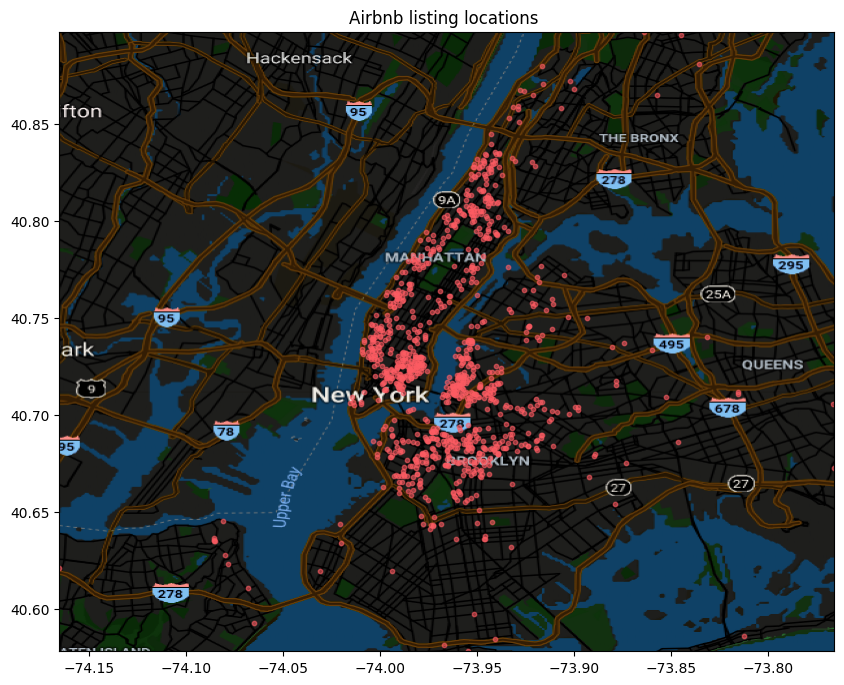

In [54]:
longlat_min_max = (df.longtitude.min(),df.longtitude.max(), df.latitude.min(), df.latitude.max())

nyc = plt.imread('./nyc-map.png')

fig, ax = plt.subplots(figsize=(10,9))

ax.scatter(df.longtitude, df.latitude, zorder=1, alpha=0.6, c='#fd5c63', s=10)
ax.set_title('Airbnb listing locations ')
ax.imshow(nyc, extent=longlat_min_max);

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Fixing `availability_365` values

This columns should casted to numeric dtype, but it has many invalid string values, like `43+N524`, that should be coerced while casting.

Also we can see many values out of domain, let's fix them:
- Negative numbers, that should be converted to positive.
- Numbers above 365, that should be dropped.

In [55]:
df['availability_365'].unique()

array(['365', '355', '194', '0', '129', '220', '188', '6', '39', '314',
       '46', '321', '12', '21', '347', '364', '304', '233', '85', '75',
       '311', '67', '255', '284', '359', '269', '340', '22', '96', '345',
       '273', '3454', '95', '215', '265', '192', '251', '302', '140',
       '234', '257', '30', '301', '294', '320', '154', '5234', '180',
       '231', '297', '292', '191', '72', '362', '336', '116', '88', '224',
       '322', '324', '132', '295', '238', '209', '328', '7', '272', '26',
       '288', '317', '207', '185', '158', '9', '198', '219', '342', '312',
       '243', '152', '137', '222', '346', '208', '279', '250', '164',
       '298', '260', '107', '199', '299', '20', '318', '216', '245',
       '189', '307', '310', '213', '278', '16', '178', '275', '163', '34',
       '280', '1', '170', '214', '248', '262', '339', '10', '290', '230',
       '53', '126', '3', '37', '353', '177', '1111', '246', '225', '18',
       '343', '326', '162', '240', '363', '247', '323', '

In [56]:
# your code goes here
df['availability_365'] = pd.to_numeric(df['availability_365'], errors='coerce')
df = df.loc[(df['availability_365'] >= 0) & (df['availability_365'] <=365)]
df['availability_365'].head()



,availability_365
listing_id,
2539,365.0
2595,355.0
3831,194.0
5022,0.0
5099,129.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Most reviews

Create a Series `most_reviews` containing the top 10 `host_name`s with the most total (sum) reviews per month accross all properties owned by that host.

In [58]:
# your code goes here
most_reviews = df['reviews_per_month'].groupby(df['host_name']).sum().sort_values(ascending=False).head(10)
most_reviews


,reviews_per_month
host_name,
Jason,17.43
Mark,9.12
Daniel,8.77
Carol,8.50
Lissette,8.19
Marylyn,8.17
Ben,7.54
Dennis,7.46
Waldemar,7.36


#### Visualizing most_reviews

Text(0, 0.5, '')

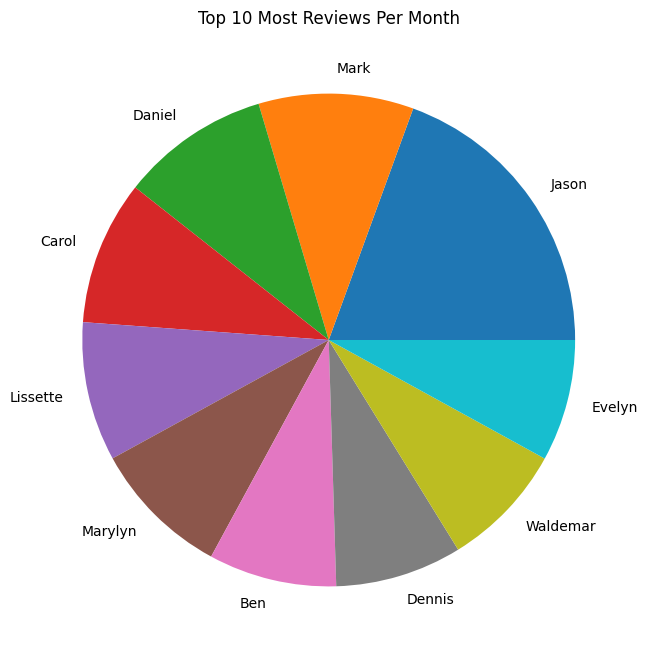

In [59]:
most_reviews.plot(kind='pie',figsize=(8, 8))

plt.title("Top 10 Most Reviews Per Month")
plt.ylabel("")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Most expensive listings

Create a variable `expensive_listings_df` containing the top 100 most expensive per night listings. The most expensive should be at the top.

In [60]:
# your code goes here
expensive_listings_df = df.sort_values(by='price', ascending=False).head(100)
expensive_listings_df.head()


,listing_name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,borough,latitude,longtitude
listing_id,,,,,,,,,,,,,,,
174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Entire home/apt,2000.0,30,30,2018-05-05,0.33,11,0.0,Upper West Side,Manhattan,40.77350,-73.98697
273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Entire home/apt,1300.0,5,28,2018-09-25,0.31,4,297.0,West Village,Manhattan,40.73301,-74.00268
250801,Heart & Soul of Greenwich Village,1314834,Rhona,Entire home/apt,850.0,3,107,2019-05-23,1.15,1,249.0,Greenwich Village,Manhattan,40.73129,-73.99944
19601,perfect for a family or small group,74303,Maggie,Entire home/apt,800.0,1,25,2016-04-08,0.24,1,7.0,Brooklyn Heights,Brooklyn,40.69723,-73.99268
279857,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Entire home/apt,800.0,4,122,2019-02-07,1.37,1,257.0,Bedford-Stuyvesant,Brooklyn,40.68492,-73.95489


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which neighbourhood has biggest amount of expensive listings?

Using the `expensive_listings_df` listings count the occurrences of each `neighbourhood` they belong.

In [61]:
# your code goes here
expensive_listings_df['neighbourhood'].value_counts()


,count
neighbourhood,
Williamsburg,10
Chelsea,9
Greenpoint,7
Harlem,7
West Village,7
East Village,7
Upper West Side,5
Nolita,4
Clinton Hill,4


#### Visualizing neighbourhoods

<Axes: xlabel='neighbourhood'>

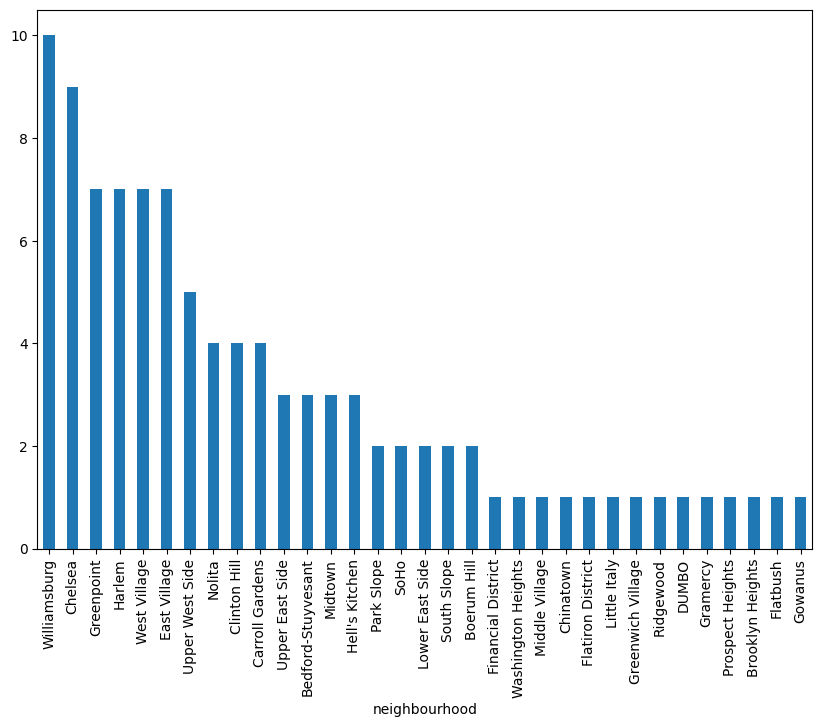

In [62]:
expensive_listings_df['neighbourhood'].value_counts().plot(kind='bar', figsize=(10,7))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which neighbourhood has the most listings?

Using all the listings from `airbnb_df` count how many listings each neighbourhood has. Keep just the top 10 neighbourhoods with the most listings.

In [63]:
# your code goes here
df['neighbourhood'].value_counts().head()


,count
neighbourhood,
Williamsburg,109
Harlem,74
Bedford-Stuyvesant,71
East Village,65
Upper West Side,44


#### Visualizing neighbourhoods

<Axes: xlabel='neighbourhood'>

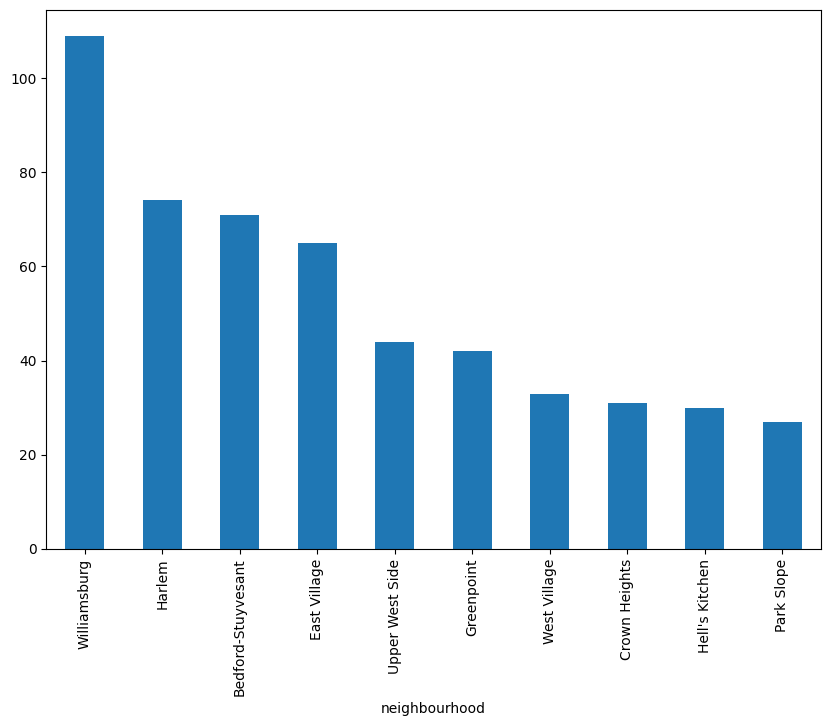

In [65]:
df['neighbourhood'].value_counts().head(10).plot(kind='bar', figsize=(10,7))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)